In [253]:
#!pip install seaborn
from torch.utils.data import Dataset, DataLoader
from disent.data.groundtruth import XYSquaresClusterData
from disent.dataset.groundtruth import GroundTruthDataset
from disent.data.groundtruth.base import GroundTruthData
from disent.transform import ToStandardisedTensor
data: GroundTruthData = XYSquaresClusterData()
dataset: Dataset = GroundTruthDataset(data, transform=ToStandardisedTensor())
dataloader = DataLoader(dataset=dataset, batch_size=67, shuffle=False)
images=next(iter(dataloader))['x_targ'][-1]
img = images[0]

In [2]:
## import pytorch_lightning as pl
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle
import numpy as np
import torchvision

#grid_img = torchvision.utils.make_grid(images,pad_value=1, ncol=4)

[1.]


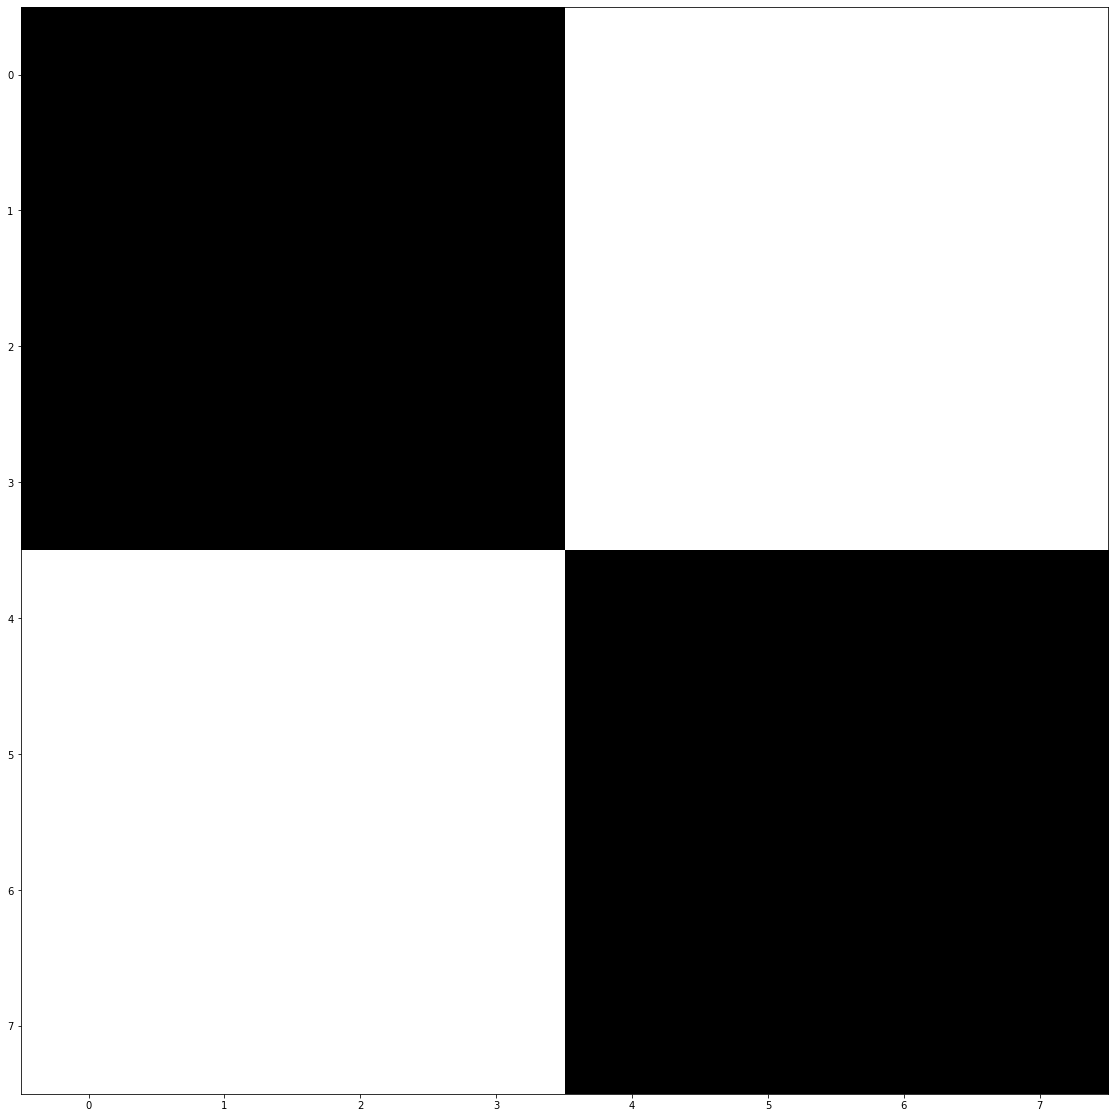

In [32]:
cluster1 = np.ones((8,8,1))
cluster2 = np.ones((8,8,1))
cluster2[:4,4:]=0
cluster2[4:,:4]=0
#cluster2[4:,4:]=1
#cluster2[:4,:4]=1
#base = np.zeros((8,8,1))*255
plt.imshow(cluster2,cmap='gray')
print(cluster2[0,0])
cluster2 = np.ones((8,8,1)) - cluster2
plt.imshow(cluster2,cmap='gray')

[0.]


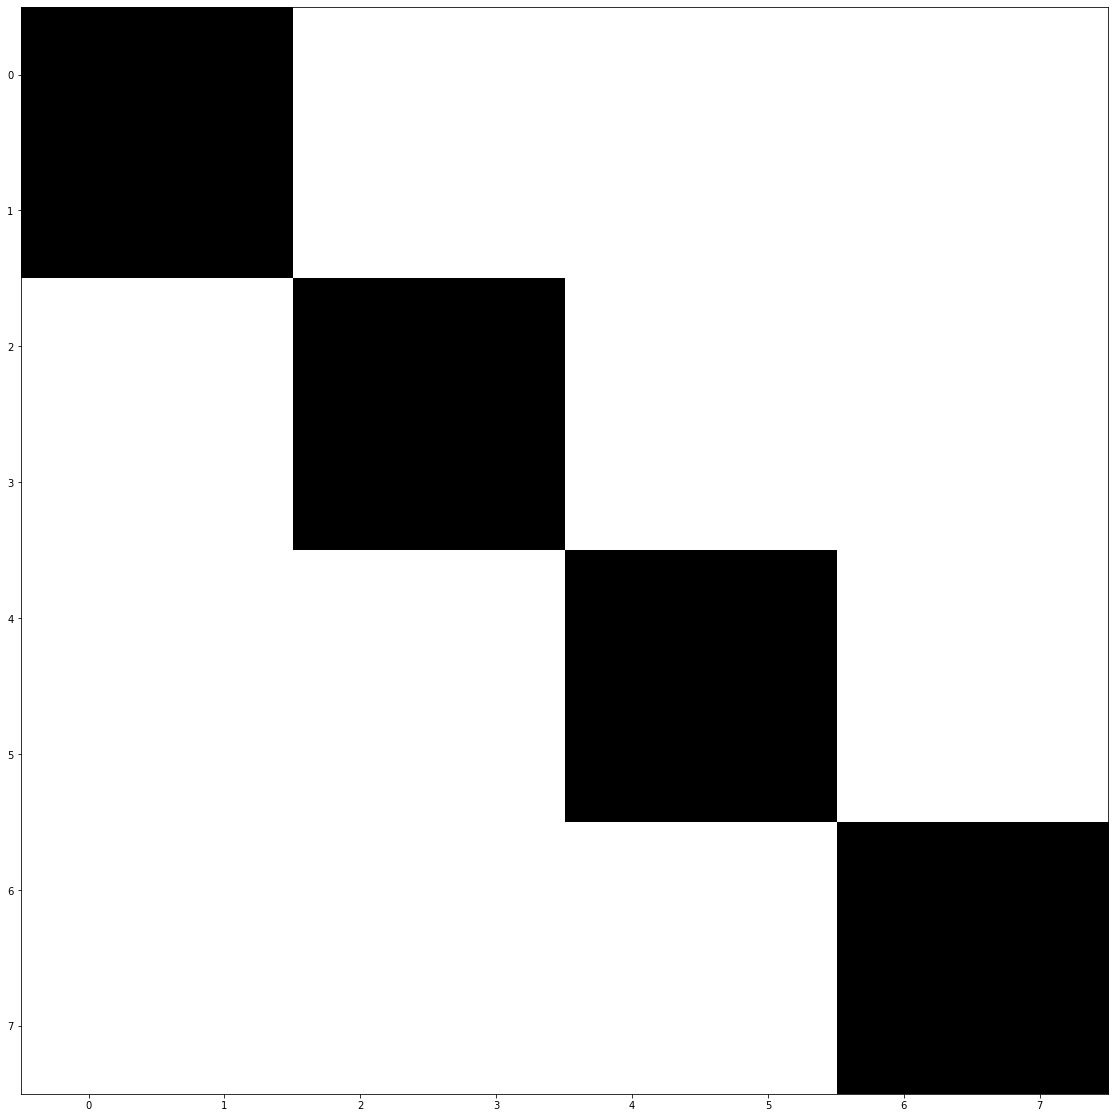

In [33]:

cluster1 = np.ones((8,8,1))
cluster4 = np.ones((8,8,1))
cluster4[:4,4:]=0
cluster4[4:,:4]=0
cluster4[0:2,2:4]=0
cluster4[2:4,0:2]=0
cluster4[4:6,6:8]=0
cluster4[6:8,4:6]=0
#cluster2[4:,4:]=1
#cluster2[:4,:4]=1
#base = np.zeros((8,8,1))*255
plt.imshow(cluster4,cmap='gray')
print(cluster2[0,0])
cluster4 = np.ones((8,8,1)) - cluster4
plt.imshow(cluster4,cmap='gray')

Accent


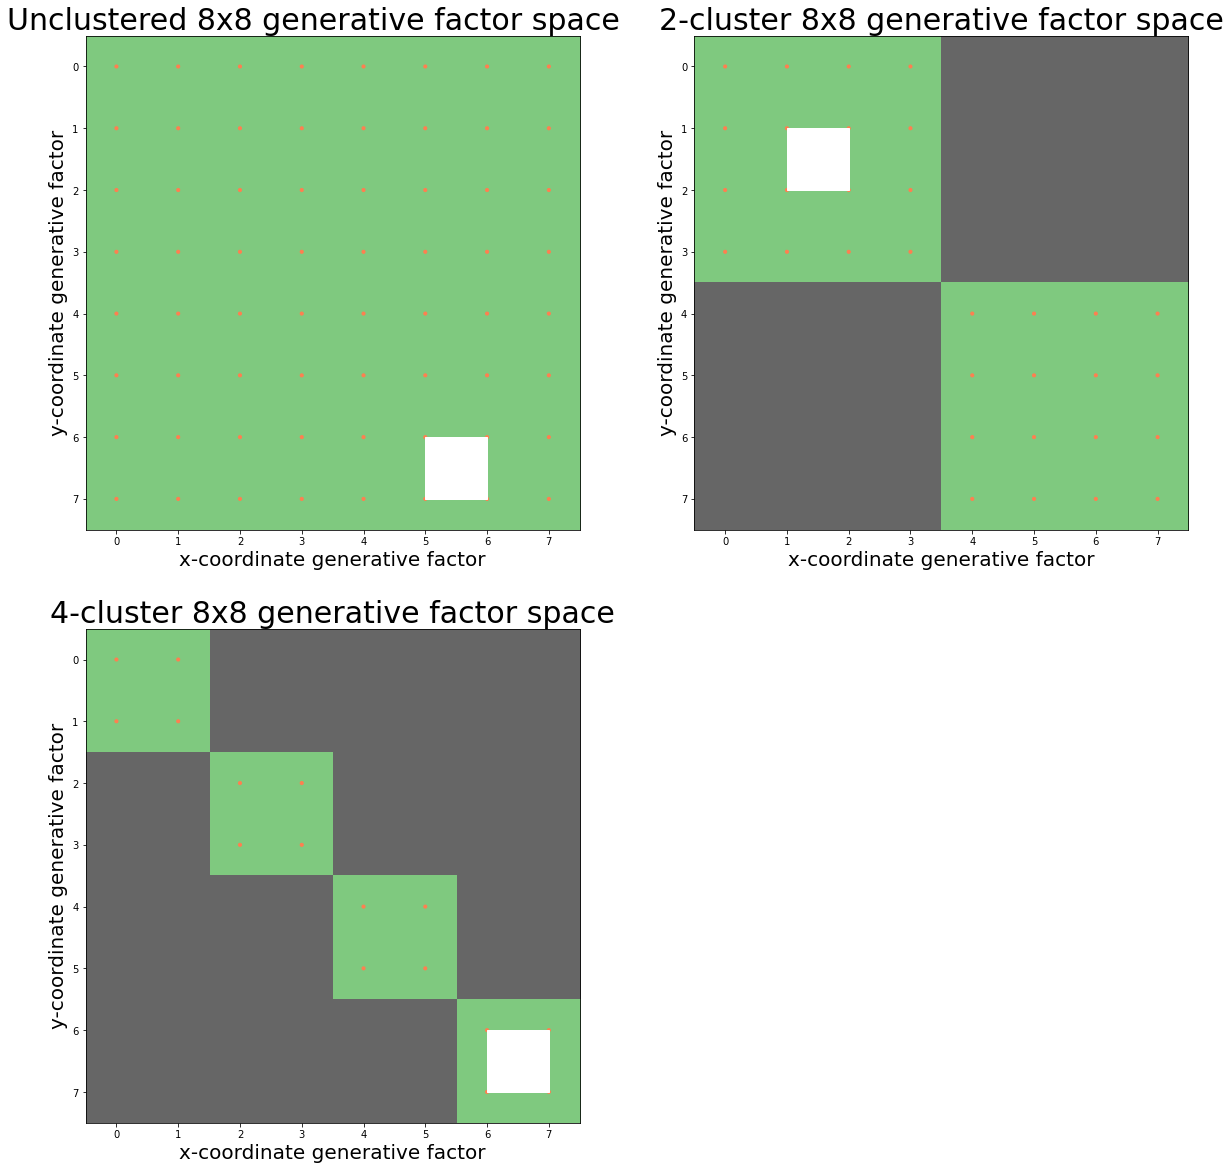

In [41]:
cmap_list = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r']

CMAP = cmap_list[0]
print(CMAP)

plt.rcParams["figure.figsize"] = (20,20)
f = plt.figure()

f.fontsize=30
f1 = f.add_subplot(2,2, 1)
plt.imshow(np.ones(cluster2.shape),cmap=CMAP)
#plt.setp(f1.get_xticklabels(), Fontsize=20)
#plt.setp(f1.get_yticklabels(), Fontsize=20)
f1.set_title('Unclustered 8x8 generative factor space    ', size=30) 
f1.set_xlabel('x-coordinate generative factor', fontsize=20)
f1.set_ylabel('y-coordinate generative factor',  fontsize=20)
for xx in range(0,8):
    for yy in range(0,8):
        circ = Circle((xx,yy),0.025, color='coral')
        f1.add_patch(circ)

sprite = Rectangle((5,6), 1,1, color='white')
f1.add_patch(sprite)
f1.plot()

###################################

f2 = f.add_subplot(2,2, 2)
plt.imshow(cluster2,cmap=CMAP)
f2.set_title('2-cluster 8x8 generative factor space', size=30)
#plt.setp(f2.get_xticklabels(), Fontsize=16)
#plt.setp(f2.get_yticklabels(), Fontsize=16)
f2.set_xlabel('x-coordinate generative factor',  fontsize=20)
f2.set_ylabel('y-coordinate generative factor', fontsize=20)

for xx in range(0,4):
    for yy in range(0,4):
        circ = Circle((xx,yy),0.025, color='coral')
        f2.add_patch(circ)

for xx in range(4,8):
    for yy in range(4,8):
        circ = Circle((xx,yy),0.025, color='coral')
        f2.add_patch(circ)
        
sprite = Rectangle((1,1), 1,1, color='white')
f2.add_patch(sprite)

f3 = f.add_subplot(2,2,3)
plt.imshow(cluster4,cmap=CMAP)
f3.set_title('4-cluster 8x8 generative factor space', size=30)
#plt.setp(f2.get_xticklabels(), Fontsize=16)
#plt.setp(f2.get_yticklabels(), Fontsize=16)
f3.set_xlabel('x-coordinate generative factor',  fontsize=20)
f3.set_ylabel('y-coordinate generative factor', fontsize=20)

for xx in range(0,2):
    for yy in range(0,2):
        circ = Circle((xx,yy),0.025, color='coral')
        f3.add_patch(circ)

for xx in range(2,4):
    for yy in range(2,4):
        circ = Circle((xx,yy),0.025, color='coral')
        f3.add_patch(circ)

for xx in range(4,6):
    for yy in range(4,6):
        circ = Circle((xx,yy),0.025, color='coral')
        f3.add_patch(circ)
        
for xx in range(6,8):
    for yy in range(6,8):
        circ = Circle((xx,yy),0.025, color='coral')
        f3.add_patch(circ)
        
sprite = Rectangle((6,6), 1,1, color='white')
f3.add_patch(sprite)



plt.show(block=True)
f.savefig('factor_clusters.png')